# SC42150 - Python assignment 2

Adaptive Noise Cancellation Applied to RF Communication



## Team members

Name (student number):

Name (student number):

## Introduction

This application follows the theory from Chapter 9. The goal of adaptive noise
cancellation is to remove interference from a signal of interest by means of a
correlated noise reference signal. In this example, we consider an RF communication system consisting of an
emitter and a receiver. These systems experience noise at the receiver that causes
signal degradation. The interference originates from the thermal noise of the system
and from the RF environment. The receiver measures signals of interest
on the main channel and reference noise on a secondary channel. Since both
channels have different propagation delays and distortions, the noise signals are
distinct. However, the unwanted noise in the primary port and the reference
noise are highly correlated. Therefore, it is possible to design a linear FIR filter
that produces an estimate of the interference from the primary channel. We wish
to use the theory of Wiener filters to recover the underlying audio signal.

## Reporting


The report of this python exercise consists of a PDF version of this Jupyter Notebook file, with your answers added after each question. Answers will consist of code and/or text (markdown) cells.
In order to create a PDF version of this file, go to the top left, click on `File` then `Download As` and Choose **PDF**.
If this feature is not supported by your system, you can also choose **LaTeX**.
Then, you can use your preferred **LaTeX** compiler to create the **PDF**. After generation you PDF report, please double check if all answers/plots are correctly displayed.

Moreover, you will also need to send the .mat file with the signals used in this exercise. Don't forget to edit your team member's name and student number above. You will submit one Jupyter notebook per team.

## First steps

Make sure that the files `Audio.py`, `Communication.py` and `anc.jpg` are included in the same directory as this Jupyter notebook. Run the following code:

In [ ]:
! pip install pyserial
! pip install sounddevice
! pip install scipy

**Note:** You only need to execute this code snippet once, after that your python will permanently include the modules. If the the code gives an error, manually install the modules using pip in the command prompt. In Windows: start button->search, type cmd->`pip install package_name`

## Question 1
Follow the instructions bellow in order to transmit/receive the signals that will be used in this assignment.

### Signal transmission

- Place a 32-bit .wav file in the same folder as this jupyter notebook (you can use the `piano.wav` or `gong.wav` files provided). Fill in the filename in the function `Audio.read_audiofile('filename.wav',length_seconds)` to load the audio;
- Set a desired duration for the transfer. It is recommended to start with signal lengths of one second to three, since serial transmission is a slow protocol;
- Connect the transceiver to a USB port. If the device is functioning properly, when instantiating the `Communication.Comm()` object you will get the following message: `Device recognized`;
- For signal transmission to take place, the receiving computer must be "listening" for signals. Make sure that the **receiver code snippet is running before executing sending**. When signal transmission starts, you will get a `started` message;
- It is suggested to start with short distances between the transmitter and the receiver, shorter than 1 meter. This will keep the SNR at acceptable levels.

### Signal acquisition

- There are two channels on the antenna of the dongles. The first listens for signals. The second channel measures adjacent noise from the environment which is correlated with the noise in the main channel. When you call `receiver.receive()`, you get two return values: the first one measures the signal from the emitters and the second measures a brown noise signal;
- When the signal is received, the program will display the message `done`.

### Receive Signal: run on receiving PC

In [ ]:
import Audio
import Communication
import numpy as np

receiver = Communication.Comm()

audio_sig, channelNoise_sig = receiver.receive()

### Send signal: run on sending PC

**Note**: Execute after the paired PC has executed the receiving code

In [ ]:
# Load modules
import Communication
import Audio

# Instantiate communication object 
transmit = Communication.Comm()

# Load audio 
length_seconds = 5
datasend = Audio.read_audiofile('piano.wav',length_seconds)

# Send
transmit.write(datasend)  

**Troubleshooting:** if you have problems transmitting the signal, try disconnecting **both** devices and connecting them again. The ports may be overflowed with data after long periods of time or there may be a poor connection. If the problem persists, also try restarting the Jupyter notebook's kernel.

### Play the signal
Go to this section after you **received** a signal.
Play the audio, can you hear the signal through the noise? If you can't hear it at all, try to reduce the distance between the transmitter and receiver devices.

In [4]:
#import sounddevice as sim
import sounddevice as sd

# function for playing a signal
# You can use it further if you want to listen smth

def play_signal( signal ):
    sd.play( signal.astype('int16'), 22050 )

In [31]:
# Load audio 
play_signal(audio_sig)

### Display signal and noise source

109217


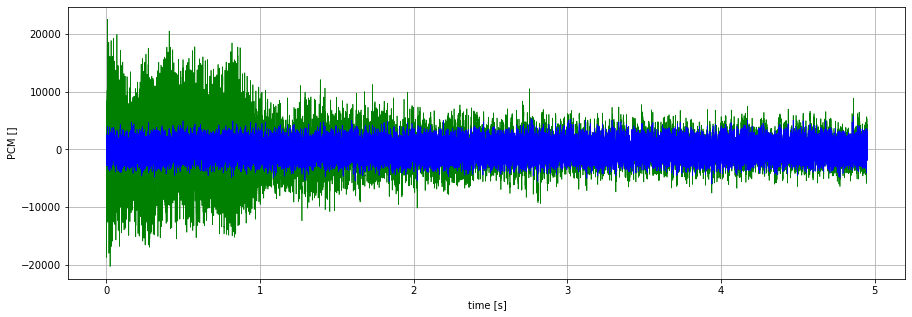

In [42]:
import matplotlib.pyplot as plt
t = np.arange(0.,  audio_sig.shape[0]/22050, 1/22050)
plt.figure(figsize=(15, 5))
plt.plot(t,audio_sig,'g', linewidth=0.7, label='raw audio')
plt.plot(t,channelNoise_sig,'b', linewidth=0.7, label='correlated noise')
plt.ylabel('PCM []')
plt.xlabel('time [s]')
plt.grid(True)
print(audio_sig.shape[0])

### Saving the signal with the noise as a .mat file
Run this section after you received and played a signal.
It will save the audio signals as a .mat file. With this file, you no longer need the RF comminication hardware to proceed with this assignment. Note that this is the .mat file you will need to hand-in together with the Jupyter notebook with your answers.

In [9]:
# saving the signals in .mat file
import scipy.io as sciio

sciio.savemat('audiodata.mat', mdict = {
    'audio' : audio_sig,
    'noise': channelNoise_sig,
})

print( f'number of points = {audio_sig.shape}' )

number of points = (109217,)


### Load the .mat file

In [153]:
# packages
import Audio
import Communication
import sounddevice as sd
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import scipy

# load the data file
data = sio.loadmat('audiodata_piano.mat')  # contains data, (print to see)

# constants
N = len( data['audio'][0] ) # number of data points per signal
x = np.arange( 0, N )  # point indices
print( f'\nN = {N}' )

audio_sig = data['audio'][0]
channelNoise_sig = data['noise'][0]

length_seconds = 5
og_audio = Audio.read_audiofile('piano.wav',length_seconds)


N = 109217


## Question 2

Formulate the problem as a Minimum Variance FIR Wiener Problem, using the symbols $v_1, \ v_2, \ y, \ \hat{v}_1, \ d,$ and $e$ as in the figure below. No numerical values are required in this part. It is sufficient to connect the theory to the practice by explaining the meaning of all the symbols and their relation to the two measured signals: *audio_sig* and *channelNoise_sig*. Also explain how to finally recover the interference-free audio signal when the Wiener problem has been solved. **(3 points)**

![alt text][anc]

[anc]: ./anc.JPG

### Answer 2

An active noise cancelling system relies on using at least two sensors to measure the sound. The primary sensor measures signal $y(n)$, in this exercise it is *audio_sig*, which is a combination of the desired signal $d(n)$ and the noise to be removed $v_1(n)$. The second sensor should be placed away from the source of the desired signal, where only the noise is audible. Because this second sensor is placed in a different location than the primary sensor, the amplitude and phase may be different, along with other distortions. For this reason, the noise measured by the second sensor is different from $v_1(n)$ and is denoted by $v_2(n)$, which in this exercise corresponds to *channelNoise_sig*. The goal of the noise cancelling system is to design the Wiener filter $W(z)$ such that it approximates $v_1(n)$ well - this results in signal $\hat{v}_1(n)$, based on signal $v_2(n)$. Then, approximation $\hat{v}_1(n)$ is subtracted from signal $y(n)$, which results in an approximation of the desired signal. This approximation contains the actual desired signal $d(n)$ plus the error $e(n)$, which is defined as the difference between the actual noise $v_1(n)$ and the approximated noise $\hat{v}_1(n)$. 

The noise cancelling problem boils down to minimizing the variance of the error $e(n)$ by choosing appropriate coefficients of the Wiener filter $w$. The relation between the measured noise $v_2(n)$ and the approximated actual noise $\hat{v}_1(n)$ is then defined as:

$\hat{v}_1(n) = w(0)v_2(n) + w(1)v_2(n-1) + \ldots + w(m-1)v_2(n-m+1)$

$\mathbf{w} = \begin{bmatrix} w(0) \\ w(1) \\ \vdots \\ w(m-1) \end{bmatrix} $

$\mathbf{v_2(n)} = \begin{bmatrix} v_2(n) \\ v_2(n-1) \\ \vdots \\ v_2(n-m+1) \end{bmatrix} $

$\hat{v}_1(n) = \mathbf{w^H} \mathbf{v_2(n)} $

Now the optimization problem can be written as follows:

$ \underset{w}{\operatorname{min}} E[|\mathbf{w^H} \mathbf{v_2(n)}-v_1(n)|^2]$

## Question 3
Determine the Wiener-Hopf equation for this problem, and explain how the different terms in the equation relate to the two measured signals. What assumptions do we use here to obtain the values of the filter $w$? **(2 points)**

### Answer 3

As proved in Theorem 9.1 in the Lecture Notes, the solution to the Minimum Variance FIR Wiener problem is given in terms of the so-called Wiener-Hopf equation, under the assumption that all the stochastic processes involved are zero-mean Wide-Sense Stationary. For a general Wiener filter, the task is to design the filter such that it approximates the desired signal $d(n)$ as $\hat{d}(n)$ by minimizing the variance of the difference between these two. The measured signal is denoted by $x(n)$ and it is a sum of the desired signal $d(n)$ and the noise $v(n)$. This signal goes through the Wiener filter, where the relation between signal $x(n)$, the approximation of the desired signal $\hat{d}(n)$ and the Wiener coefficients is equivalent to the one for an Active Noise Cancelling problem defined in Answer 2. The Wiener-Hopf equation for the generic problem is then defined as follows:

$\mathbf{R_x} \mathbf{\hat{w}} = \mathbf{r_{dx}} $

where $ \mathbf{R_x} = E[\mathbf{x^*(n)}\mathbf{x^\top(n)}]$ and $\mathbf{r_{dx}} = E[d(n)\mathbf{x^*(n)}]$

This solution can be rewritten to match the Active Noise Cancelling problem in this exercise. While in the generic case the task is to approximate the desired signal $d(n)$, here the task is to approximate the noise $v_1(n)$ so all the $d$ indices above are now changed to $v_1$. Furthermore, in the generic case the measured signal used for the approximation is signal $x(n)$ (sum of the desired signal and the noise), while here the signal that passes through the Winer filter is the measured noise $v_2(n)$. Thus, the $x$ indices above are now changed to $v_2$. This results in the following Wiener-Hopf equation:

$\mathbf{R_{v_2}} \mathbf{\hat{w}} = \mathbf{r_{v_1 v_2}}$

with $\mathbf{R_{v_2}} = \begin{bmatrix} r_{v_2}(0) & r_{v_2}^*(1) & \ldots & r_{v_2}^*(m-1) \\ r_{v_2}(1) & r_{v_2}(0) & \ldots & r_{v_2}^*(m-2) \\ \vdots & \vdots & \ddots & \vdots \\ r_{v_2}(m-1) & r_{v_2}(m-2) & \ldots & r_{v_2}(0) \end{bmatrix}$, where the $r_{v_2}$ function is the Auto-correlation function of $v_2$;

and $\mathbf{r_{v_1 v_2}} = \begin{bmatrix} r_{v_1 v_2}(0) \\ r_{v_1 v_2}(1) \\ \vdots \\ r_{v_1 v_2}(m-1) \end{bmatrix}$, where $r_{v_1 v_2}$ is the Cross-correlation function of signals $v_1$ and $v_2$.

This problem definition has to be further revised, as signal $v_1$ is the one being approximated so its properties are not known. The signal that is measured and has its properties known is signal $y(n)$ and so the $v_1$ properties above should be appropriately replaced with those of signal $y(n)$. The properties of signal $v_2$ are known so this element of the above equation remains unchanged. Using the fact that $y(n) = d(n) + v_1(n)$, the Cross-correlation of signals $v_1$ and $v_2$ can be rewritten as:

$r_{v_1 v_2} = E[v_1(n) v_2^*(n-k)] = E[(y(n) - d(n)) v_2^*(n-k)] = E[y(n) v_2^*(n-k)] - E[d(n) v_2^*(n-k)]$

Now, an assumption is made that signals $d(n)$ and $v_2$ are uncorrelated, which renders the expression $E[d(n) v_2^*(n-k)]$ zero, leading to the following equality: 

$r_{v_1 v_2} = E[y(n) v_2^*(n-k)]$ so the $r_{v_1 v_2}$ term in the Wiener-Hopf equation can be simply replaced with $r_{y v_2}$. This leads to the following final form of the Wiener-Hopf equation for an Active Noise Cancellation problem:

$\left[\begin{array}{cccc}
r_{v_{2}}(0) & r_{v_{2}}^{*}(1) & \cdots & r_{v_{2}}^{*}(m-1) \\
r_{v_{2}}(1) & r_{v_{2}}(0) & \cdots & r_{v_{2}}^{*}(m-2) \\
\vdots & \vdots & \ddots & \vdots \\
r_{v_{2}}(m-1) & r_{v_{2}}(m-2) & \cdots & r_{v_{2}}(0)
\end{array}\right]\left[\begin{array}{c}
\hat{w}(0) \\
\hat{w}(1) \\
\vdots \\
\hat{w}(m-1)
\end{array}\right]=\left[\begin{array}{c}
r_{y v_{2}}(0) \\
r_{y v_{2}}(1) \\
\vdots \\
r_{y v_{2}}(m-1)
\end{array}\right]$

The coefficients $r_{v_2}$ and $r_{y v_2}$ are the ensemble Auto-correlation of $v_2$ and the ensemble Cross-correlation of $y$ and $v_2$, respectively. However, the sensors only measure signal of one realization of the stochatic processes so only the sample Auto- and Cross-correlation function may be directly retrieved. It is therefore assumed here that signals $y$ and $v_2$ are ergodic in the the Auto- and Cross-correlation, which is possible as they were earlier assumed to be WSS. What this means is that the sample time-average approaches the ensemble average, provided that the number of measurement points is sufficient. Thus, instead of the ensemble coefficients $r_{v_2}$ and $r_{y v_2}$, the sample coefficients $\hat{r}_{v_2}$ and $\hat{r}_{y v_2}$ may be used instead.

## Question 4

If only the measured signals are given, the auto- and cross-correlations used in the Wiener-Hopf equation need to be approximated. This can be done using the following formula:

$$\hat{r}_{v_2}(\tau) = \frac{1}{N-\tau}\sum_{n=\tau + 1}^N v_2(n) v_2(n-\tau),  \quad \hat{r}_{v_1 v_2}(\tau) = \frac{1}{N-\tau}\sum_{n=\tau+1}^N v_1(n) v_2(n-\tau).$$

Calculate the approximations of the auto- and cross-correlations using the measured signals.
Provide the used code and print the first $10$ values of the auto- and cross-correlations ($\tau = 0, 1, \ldots, 9$). **(3 points)**

### Answer 4

To obtain the values of $\hat{r}_{v_2}(\tau)$, we apply the given formula directly.

However, the calculation of $\hat{r}_{v_1 v_2}(\tau)$ isn't as straightforward, since we don't have access to the values of $v_1$. To get around this problem, as stated above, we use the fact that $d(n)$ and $v_2$ are uncorrelated. This yields the following equality:

$$ E[v1(n) v_2^*(n-k)] = E[y(n) v_2^*(n-k)] $$

Using this information, we can approximate the quantity $\hat{r}_{v_1 v_2}(\tau)$ as:

$$ \hat{r}_{v_1 v_2}(\tau) = \hat{r}_{y v_2}(\tau) = \frac{1}{N-\tau}\sum_{n=\tau+1}^N y(n) v_2(n-\tau) $$

This formula is implemented below as an alternative to obtain $\hat{r}_{v_1 v_2}(\tau)$.

In [45]:
m = 10  # Filter Order.

# Rename variables so they are in the standard notation used for
# the ANC Problem in the Wiener-Hopf FIR Filter.
v2 = channelNoise_sig
y = audio_sig

# Initialize vectors to hold the auto and cross corelation estimations.
r_v2 = np.zeros(m)
r_v1_v2 = np.zeros(m)

# Compute auto and cross correlations according to given formulas, and using
# the assumption that d(n) and v2(n) are uncorrelated.
for tau in range(0,m):
    for n in range(tau+1,N):
        r_v2[tau] += (float(v2[n])*float(v2[n-tau]))/(N-tau)
        r_v1_v2[tau] += (float(y[n])*float(v2[n-tau]))/(N-tau)

# Print the results.
print('->  The first 10 values of the auto-correlation are:')
for i in range(0,m):
    print('r_v2('+str(i)+') = ' + str(r_v2[i]))
print('\n->  The first 10 values of the cross-correlation are:')
for i in range(0,m):
    print('r_v1_v2('+str(i)+') = ' + str(r_v1_v2[i]))

->  The first 10 values of the auto-correlation are:
r_v2(0) = 1830282.4561285954
r_v2(1) = 1146201.5972659856
r_v2(2) = 1031109.3900654701
r_v2(3) = 929505.2798450792
r_v2(4) = 837762.2283794018
r_v2(5) = 758315.6791011977
r_v2(6) = 680855.317028522
r_v2(7) = 610723.9878948858
r_v2(8) = 555436.0018954584
r_v2(9) = 498972.44211962656

->  The first 10 values of the cross-correlation are:
r_v1_v2(0) = 2518398.0032138266
r_v1_v2(1) = 1992807.094226133
r_v1_v2(2) = 1894389.5244792348
r_v1_v2(3) = 1803293.8179537463
r_v1_v2(4) = 1717284.7355076917
r_v1_v2(5) = 1639173.2362652568
r_v1_v2(6) = 1559424.549679049
r_v1_v2(7) = 1482798.3888105506
r_v1_v2(8) = 1417499.3542473586
r_v1_v2(9) = 1348980.9941487825


## Question 5

Using a 10-th order FIR Wiener filter, calculate the optimal filter coefficients. Provide the used code and print the 10 filter coeficients. *Hint: the `scipy.linalg.toeplitz` function may be useful for defining the covariance matrix*. **(3 points)**

### Answer 5

In [46]:
# Calculation of the correlation matrix (equal to the covariance matrix,
# since the mean of all stochastic processes is assumed to be zero), using the
# provided function.
Rx = scipy.linalg.toeplitz(r_v2)

# Invert matrix. This is needed to obtain w_opt.
Rx_inv = scipy.linalg.inv(Rx)

# Find w_opt  from Rx*w_opt = r_v1_v2, as in equation 9.21 of the reader.
w_opt = np.matmul(Rx_inv, r_v1_v2)

# Print the results.
print('\n->  The Wiener Filter Coefficients are:')
for i in range(0,m):
    print('w_opt('+str(i)+') = ' + str(w_opt[i]))


->  The Wiener Filter Coefficients are:
w_opt(0) = 1.001493042535887
w_opt(1) = 0.1509478821744645
w_opt(2) = 0.10423839211681803
w_opt(3) = 0.0790435843031791
w_opt(4) = 0.06713991795227923
w_opt(5) = 0.06388730853319777
w_opt(6) = 0.06619699722849856
w_opt(7) = 0.07700589357375685
w_opt(8) = 0.10235982504586884
w_opt(9) = 0.1558507895099757


## Question 6

We can now use the filter $w_{opt}$ to obtain our estimate of the noiseless audio signal.
Calculate the recovered audio signal using the optimal Wiener filter.
Plot both the measured noise and the recovered noiseless audio signal. 
*Hint: the function `scipy.signal.lfilter` can be useful when using the Wiener filter*. **(3 points)**

### Answer 6

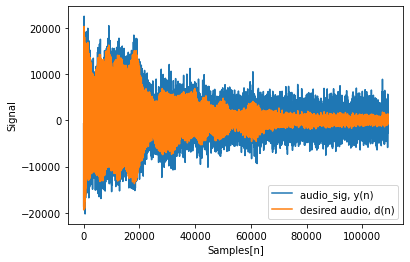

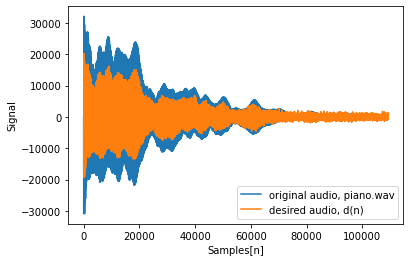

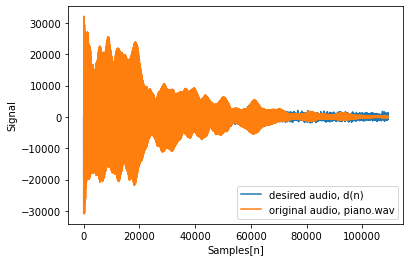

In [107]:
# v1_hat = scipy.signal.lfilter(w_opt,1,v2)

# Define vector to store values of v1_hat.
v1_hat = np.zeros(N)

# "Manual" implementation of the function scipy.signal.lfilter.
# This was done to better understand how the multiplication process works for
# the first m values of v1_hat.

# For the values of v1_hat(n) until n=m, we ramp up the order of the 
# filter (denoted as m_) as the number of points grows.
m_ = -1
for n in range(0,m+1):
    m_ += 1
    for i in range(m_):
        v1_hat[n] += float(w_opt[i])*float(v2[n-i])
# After the index n=m, we keep the filter order constant.
for n in range(m+1,N):
    for i in range(m):
        v1_hat[n] += float(w_opt[i])*float(v2[n-i])

# Obtain the desired signal, d, by subtracting the estimated v1 value, v1_hat.
d = y-v1_hat

# Plot the results.
time = np.linspace(0,N, N)

# Plot d(n) against y(n), to evaluate the effect of v1_hat in y(n).
plt.figure(1)
plt.plot(time,y, label="audio_sig, y(n)") # audio_sig in blue. y = d + v1
plt.plot(time,d, label="desired audio, d(n)") # desired value in orange. y = d + v1
plt.xlabel('Samples[n]')
plt.ylabel('Signal')
_= plt.legend(loc="lower right")

# Plot d(n) against the original audio to retrieve, to get a sense for how
# good/bad the filtering results were.
# This is plotted twice, once with d(n) in front, once with d(n) behind, so 
# that the full evolution can be percieved.
plt.figure(2)
plt.plot(time,og_audio[0:N],label="original audio, piano.wav") # original audio we're trying to retrive, in orange.
plt.plot(time,d, label="desired signal, d(n)") # desired value in blue. y = d + v1
plt.xlabel('Samples[n]')
plt.ylabel('Signal')
_= plt.legend(loc="lower right")

plt.figure(3)
plt.plot(time,d, label="desired signal, d(n)") # desired value in blue. y = d + v1
plt.plot(time,og_audio[0:N],label="original audio, piano.wav") # original audio we're trying to retrive, in orange.
plt.xlabel('Samples[n]')
plt.ylabel('Signal')
_= plt.legend(loc="lower right")

## Question 7
To investigate the effect of the filter order on the estimate of the audio bitstream, we will vary the filter order between $m= 2$ and $m= 20$. In you experiments, what is the minimum order necessary to remove the environmental noise? In other words, around what number does an increase in filter order no longer yield a significant improvement?  Justify your answer. **(3 points)**

### Answer 7

To approach the question at hand, the cost funtion $J(\mathbf{w})$ can be used to evaluate the effectiveness of the filter $\mathbf{w}$:

$$J(\mathbf{w}) = E[|e(n;\mathbf{w})|^2]  \Rightarrow  J(\mathbf{\hat{w}}) = E[|e(n;\mathbf{\hat{w}})|^2] = r_d(0)- \mathbf{r_{dx}^H R_x^{-1}r_{dx}}$$

Recalling the original problem is one of the minimization, one can conclude that $J(\mathbf{\hat{w}})$ decreases (and thus, the filter quality increases) as the quantity $\mathbf{r_{dx}^H R_x^{-1}r_{dx}}$ increases.

To evaluate the evolution of $\mathbf{r_{dx}^H R_x^{-1}r_{dx}}$, this quantity was calculated at for every order ranging from $m=2$ to $m=20$.

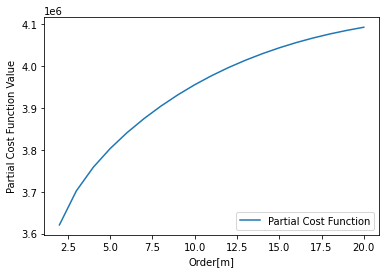

In [154]:
# Define vector to hold the partial (without rd(0)) values of J(w).
J_hat = np.zeros(19)

for m in range(2,21):
    # Define vectors to hold r_v2 and r_v1_v2 for every order m.
    r_v2 = np.zeros(m)
    r_v1_v2 = np.zeros(m)
    
    # Calculate values of r_v2 and r_v1_v2 for every order m.
    for tau in range(0,m):
        for n in range(tau+1,N):
            r_v2[tau] += (float(v2[n])*float(v2[n-tau]))/(N-tau)
            r_v1_v2[tau] += (float(y[n])*float(v2[n-tau]))/(N-tau)
    
    # Obtain the optimal filter coefficients.
    Rx = scipy.linalg.toeplitz(r_v2)
    Rx_inv = scipy.linalg.inv(Rx)
    w_opt = np.matmul(Rx_inv, r_v1_v2)

    # Store partial values of J(w)
    J_hat[m-2] = np.matmul(np.transpose(r_v1_v2), w_opt)

# Plot the values of J_hat(w) as a function of the order m.
plt.plot(range(2,21),J_hat, label = "Partial Cost Function")
plt.xlabel('Order[m]')
plt.ylabel('Partial Cost Function Value')
_= plt.legend(loc="lower right")

The plot above shows the evolution of $\mathbf{r_{dx}^H R_x^{-1}r_{dx}}$ with the filter order $m$. The diminishing returns from increasing the order are clear. As the order increases, the value of $\mathbf{r_{dx}^H R_x^{-1}r_{dx}}$ increases as well, but in an ever smaller way.

To better quantify this diminishing returns effect, one might study the percentage evolution of the value $\mathbf{r_{dx}^H R_x^{-1}r_{dx}}$, as shown below:

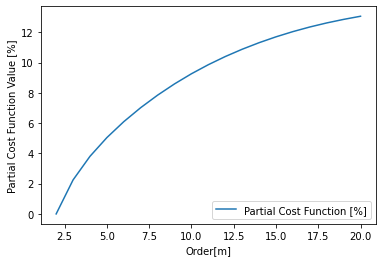

In [155]:
# Convert values to percentages.
J_hat_pc = (J_hat/J_hat[0]- 1)*100

# Plot the values of J_hat(w)[%] as a function of the order m.
plt.plot(range(2,21),J_hat_pc, label = "Partial Cost Function [%]")
plt.xlabel('Order[m]')
plt.ylabel('Partial Cost Function Value [%]')
_= plt.legend(loc="lower right")

Using the value of $\mathbf{r_{dx}^H R_x^{-1}r_{dx}}$ for $m=2$ as a basis for the analysis, the value at $m=20$ increases a total of 13\%. The first 10\% increase, however, is achieved by order $m=11$ (9.86\%, to be exact). The $9$ orders after that only increase the value $\mathbf{r_{dx}^H R_x^{-1}r_{dx}}$ by another 3\%.

Therefore, one can conclude that after and order around $m=10$ or $m=11$, the filter no longer yields significant returns.

If, further, we assume $r_d(0)$ to be known (which, in this case, we can find because we have access to the original audio, but which is generally not the case, hence the above analysis), we can calculate the actual values of the cost function $J(\mathbf{\hat{w}})$ and perform a similar analysis. Here, the following formula was used to obtain the autocorrelation value $r_d(0)$.

$$r_{d}(\tau) = \frac{1}{N-\tau}\sum_{n=1}^{N-\tau} (d(n) - \mu_d) (d(n+\tau)- \mu_d)$$

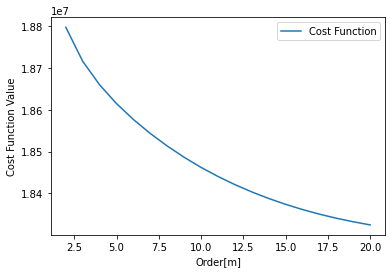

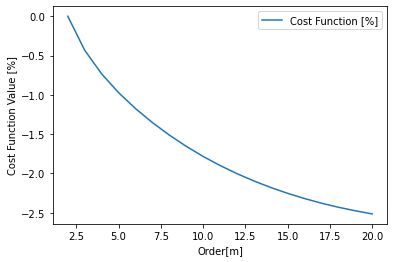

In [156]:
def estimated_autocorrelation(x):
    n = len(x)
    x = x - x.mean()
    r = np.correlate(x, x, mode = 'full')[-n:]
    result = r/((np.arange(n, 0, -1)))
    return result

# Calculate autocorrelation of the original audio signal.
rd = estimated_autocorrelation(og_audio)

# Calculate Cost Function J(w) using J_hat and rd[0].
J = rd[0]-J_hat

# Plot the value of J(w) as a function of the order m.
plt.figure(1)
plt.plot(range(2,21),J, label = "Cost Function")
plt.xlabel('Order[m]')
plt.ylabel('Cost Function Value')
plt.legend(loc="upper right")

# Convert values to percentages.
J_pc = (J/J[0] - 1)*100
plt.figure(2)
# Plot the value of J(w)[%] as a function of the order m.
plt.plot(range(2,21),J_pc, label = "Cost Function [%]")
plt.xlabel('Order[m]')
plt.ylabel('Cost Function Value [%]')
_= plt.legend(loc="upper right")

Again, we notice a total decrease in the value of $J(\mathbf{\hat{w}})$ of about 2.5\%, but, by order $m=11$, the decrease is already of about 1.9\%

Therefore, the conclusions are simlilar to the ones in the above analysis, in that, after $m=10$ or $m=11$, the filter no longer yields significant returns.